In [1]:
import pandas as pd

train_data = pd.read_csv('projectAI_train.csv')
test_data = pd.read_csv('projectAI_test.csv')

In [4]:
print(len(train_data))
print(len(test_data))

210
90


In [5]:
train_data.shape


(210, 4)

In [6]:
test_data.shape

(90, 4)

In [7]:

# Separate features and labels
x_train = train_data.iloc[:, :-1].values  # Features: all columns except the last
y_train = train_data.iloc[:, -1].values   # Labels: the last column

x_test = test_data.iloc[:, :-1].values    # Features: all columns except the last
y_test = test_data.iloc[:, -1].values     # Labels: the last column




In [8]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (210, 3)
y_train shape: (210,)
x_test shape: (90, 3)
y_test shape: (90,)


In [9]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

In [10]:
print(f"y_train shape: {one_hot_train_labels.shape}")
print(f"y_test shape: {one_hot_test_labels.shape}")

y_train shape: (210, 3)
y_test shape: (90, 3)


In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(3,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [12]:
model.compile(optimizer='Adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [13]:
#slicing first 50 and rest of 160 (total210)
x_val = x_train[:50]
partial_x_train = x_train[50:]
y_val = one_hot_train_labels[:50]
partial_y_train = one_hot_train_labels[50:]

In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,# we see next 3 consectutive valuein learningcurve to see the behavior --Asnaff
                               verbose=1,
                               restore_best_weights=True)

#checkpoint to save .h5 file(export model) --Asnaff
model_checkpoint = ModelCheckpoint(filepath='Tree_best_model.h5',
                                   monitor='val_loss',
                                   save_best_only=True,
                                   verbose=1)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=10,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
 1/16 [>.............................] - ETA: 16s - loss: 6.9134 - accuracy: 0.2000
Epoch 1: val_loss improved from inf to 2.14798, saving model to Tree_best_model.h5
16/16 [==============================] - 2s 37ms/step - loss: 3.1953 - accuracy: 0.3125 - val_loss: 2.1480 - val_accuracy: 0.3200
Epoch 2/50
 1/16 [>.............................] - ETA: 0s - loss: 1.9502 - accuracy: 0.4000
Epoch 2: val_loss improved from 2.14798 to 1.20227, saving model to Tree_best_model.h5
16/16 [==============================] - 0s 10ms/step - loss: 1.5343 - accuracy: 0.2688 - val_loss: 1.2023 - val_accuracy: 0.3600
Epoch 3/50
 1/16 [>.............................] - ETA: 0s - loss: 1.3155 - accuracy: 0.3000
Epoch 3: val_loss improved from 1.20227 to 0.98159, saving model to Tree_best_model.h5
16/16 [==============================] - 0s 9ms/step - loss: 1.1108 - accuracy: 0.1375 - val_loss: 0.9816 - val_accuracy: 0.0000e+00
Epoch 4/50
 1/16 [>.............................] - ETA: 0s - loss:

Epoch 28/50
 1/16 [>.............................] - ETA: 0s - loss: 0.1617 - accuracy: 1.0000
Epoch 28: val_loss improved from 0.22408 to 0.21268, saving model to Tree_best_model.h5
16/16 [==============================] - 0s 9ms/step - loss: 0.2458 - accuracy: 0.9375 - val_loss: 0.2127 - val_accuracy: 0.9800
Epoch 29/50
 1/16 [>.............................] - ETA: 0s - loss: 0.1708 - accuracy: 1.0000
Epoch 29: val_loss did not improve from 0.21268
16/16 [==============================] - 0s 5ms/step - loss: 0.2401 - accuracy: 0.9625 - val_loss: 0.2594 - val_accuracy: 0.9400
Epoch 30/50
 1/16 [>.............................] - ETA: 0s - loss: 0.2090 - accuracy: 1.0000
Epoch 30: val_loss improved from 0.21268 to 0.19882, saving model to Tree_best_model.h5
16/16 [==============================] - 0s 8ms/step - loss: 0.2204 - accuracy: 0.9563 - val_loss: 0.1988 - val_accuracy: 0.9400
Epoch 31/50
 1/16 [>.............................] - ETA: 0s - loss: 0.3296 - accuracy: 0.9000
Epoch 31:

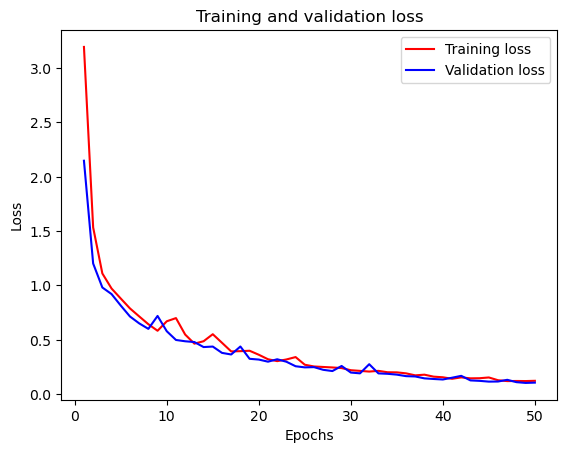

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

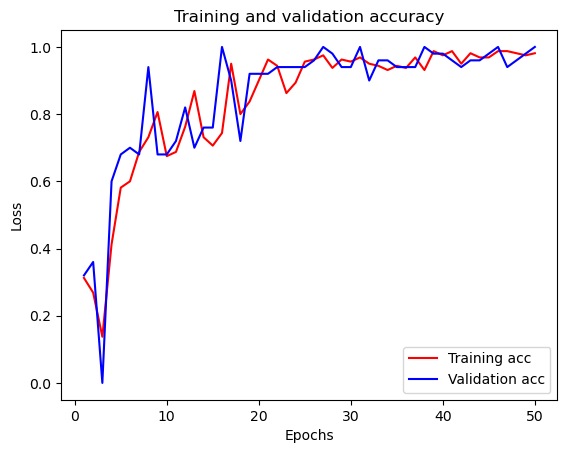

In [16]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
results = model.evaluate(x_test, one_hot_test_labels)

3/3 [==============================] - 0s 3ms/step - loss: 0.1043 - accuracy: 1.0000


In [18]:
results 

[0.10429603606462479, 1.0]

In [19]:
predictions = model.predict(x_test)
predictions.shape

3/3 [==============================] - 0s 2ms/step


(90, 3)

In [20]:
import numpy as np
np.sum(predictions[77])

1.0

In [21]:
np.argmax(predictions[10])

1

In [22]:
prediction1=model.predict(x_test[:10])
prediction1.shape

1/1 [==============================] - 0s 37ms/step


(10, 3)

In [23]:

# Define class names (assuming you have a mapping or know the class names)
class_names = ['Millettia Pinnata (Pongamia/Indian Beech)_Ahlaq', 'Bougainvillea glabra_Poornima', 'Ficus benjamina L._Asnaff']  # Adjust according to your dataset



In [24]:

# Print the predicted class, probability, and class name for each of the first 10 samples
for i, prediction in enumerate(prediction1):
    class_index = np.argmax(prediction)  # Find the index of the max probability
    max_probability = np.max(prediction)  # Find the max probability value
    class_label = class_index # Adjust class index if labels are 1-based
    class_name = class_names[class_index]  # Get the class name using the index
    print(f"Sample {i+1}: Max Probability = {max_probability:.4f}, Class Label = {class_label}, Species Name = {class_name}")


Sample 1: Max Probability = 0.9794, Class Label = 2, Species Name = Ficus benjamina L._Asnaff
Sample 2: Max Probability = 0.9040, Class Label = 1, Species Name = Bougainvillea glabra_Poornima
Sample 3: Max Probability = 0.9795, Class Label = 2, Species Name = Ficus benjamina L._Asnaff
Sample 4: Max Probability = 0.9844, Class Label = 0, Species Name = Millettia Pinnata (Pongamia/Indian Beech)_Ahlaq
Sample 5: Max Probability = 0.9098, Class Label = 1, Species Name = Bougainvillea glabra_Poornima
Sample 6: Max Probability = 0.9263, Class Label = 1, Species Name = Bougainvillea glabra_Poornima
Sample 7: Max Probability = 0.9802, Class Label = 2, Species Name = Ficus benjamina L._Asnaff
Sample 8: Max Probability = 0.9363, Class Label = 0, Species Name = Millettia Pinnata (Pongamia/Indian Beech)_Ahlaq
Sample 9: Max Probability = 0.6293, Class Label = 1, Species Name = Bougainvillea glabra_Poornima
Sample 10: Max Probability = 0.9771, Class Label = 2, Species Name = Ficus benjamina L._Asnaff